_ok, take a step back and think what result are we looking for_

_we have id (image id corresponding to the word), len (word length), greek, scramble, pseudo in L and R correct side_

_we have 2 tables in 240x7 dimension, which is accuracy (ratio) and reaction time (s)_

_if we want to measure timeracy, we could do a simple mean of all the pair (mean(greek), mean(scramble), mean(pseudo))_


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sea

accudf = pd.read_csv("Accuracy.csv")
timedf = pd.read_csv("reactiontime.csv")

In [2]:
# create wordlist (word pair type, consists of greek, scramble, and pseudo by default), wordlenlist (word length, consist of 3-7 by default)
wordlist = list(accudf)[2:]
wordlenlist = np.unique((accudf["len"]))

## Mean of accuracy per word pair and word length
mean of accuracy per word pair (in greek, scrumble, and pseudo * left and right correct word = 6) and by word length (3-7 letter word = 5)

look up [`subplots`](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) document page if you forgot lol

In [3]:
# accuracy part

accupair_y = [np.mean(accudf[pair]) for pair in wordlist]
accupair_err = [np.std(accudf[pair], ddof = 0)/np.sqrt(accudf[pair].size) for pair in wordlist]
acculen_y, acculen_err = [], []

# assign mean of accuracy by word and by word length, altogether with SE = SD/sqrt(count)
for pair in wordlist:
    print(pair,"accuracy =",round(np.mean(accudf[pair])*100,4), "%")

for leng in wordlenlist:
    wordlen_accudf = accudf.loc[accudf["len"] == leng,wordlist]

    acculen_y.append(np.mean(wordlen_accudf))
    acculen_err.append(np.std(wordlen_accudf.to_numpy(), ddof = 0)/np.sqrt(wordlen_accudf.size))
    
    print(leng,"letter word accuracy =",round(np.mean(wordlen_accudf)*100,4), "%")


L-greek accuracy = 41.0 %
R-greek accuracy = 37.0 %
L-scramble accuracy = 50.0 %
R-scramble accuracy = 48.0 %
L-pseudo accuracy = 50.0 %
R-pseudo accuracy = 46.0 %
3 letter word accuracy = 47.5 %
4 letter word accuracy = 47.5 %
5 letter word accuracy = 44.1667 %
6 letter word accuracy = 42.5 %
7 letter word accuracy = 45.0 %


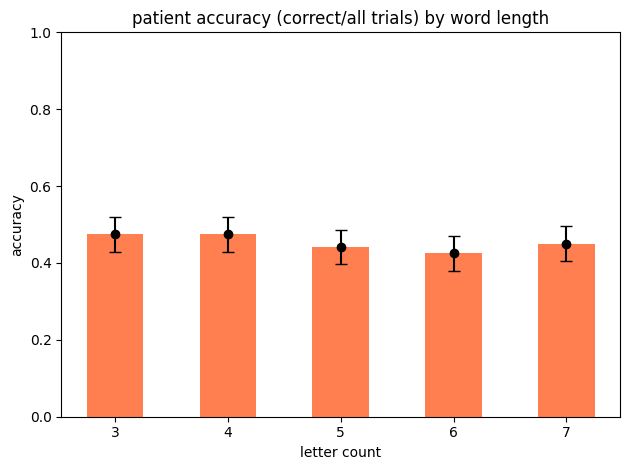

In [4]:
plt.bar(wordlenlist, acculen_y, color = "coral", width = 0.5)
plt.errorbar(wordlenlist, acculen_y, yerr = acculen_err, fmt = 'o', color = "black", capsize = 4)
plt.title("patient accuracy (correct/all trials) by word length")
plt.xlabel("letter count")
plt.ylabel("accuracy")
plt.ylim(0,1)

plt.tight_layout()
plt.show()

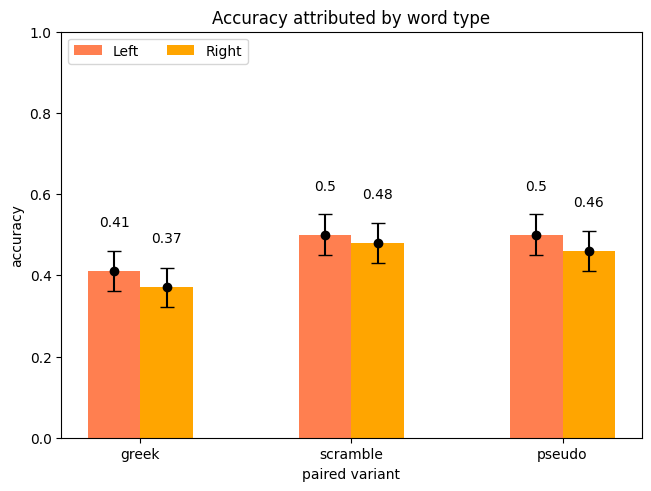

In [5]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

# create new list of variable for left and right
accupairL_y = accupair_y[::2]
accupairR_y = accupair_y[1::2]

accupairL_err = accupair_err[::2]
accupairR_err = accupair_err[1::2]

wordx = ["greek", "scramble", "pseudo"]
subplot = {"Left":accupairL_y,"Right":accupairR_y }
subplote = {"Left":accupairL_err, "Right": accupairR_err}

x = np.arange(len(wordx))  # the label locations, in this case its [0,1,2]
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, mean in subplot.items():
    offset = width * multiplier # step every bar offset, 0+0 shit in L, 0+0.25 shift in R
    colbar = "coral" if attribute == "Left" else "orange"
    rects = ax.bar(x + offset, mean, width, label=attribute, color = colbar)
    ax.bar_label(rects, padding=30)
    ax.errorbar(x + offset, mean, yerr=subplote[attribute], fmt='o', capsize=5, color='black')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('accuracy')
ax.set_title('Accuracy attributed by word type')
ax.set_xticks(x + width/2, wordx)
ax.set_xlabel("paired variant")
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)    

plt.show()

## Mean of reaction time per word pair and word length
mean of reaction time per word pair (in greek, scrumble, and pseudo = 3) and by word length (3-7 letter word = 5)


...what? it's self-explanatory

In [6]:
# reaction time part

timepair_y = [np.mean(timedf[pair]) for pair in wordlist]
timepair_err = [np.std(timedf[pair], ddof = 0)/np.sqrt(timedf[pair].size) for pair in wordlist]
timelen_y, timelen_err = [], []

# assign mean of reaction time by word and by word length, altogether with SE = SD/sqrt(count)
for pair in wordlist:
    print(pair,"reaction time =",round(np.mean(timedf[pair]),4))

for leng in wordlenlist:
    wordlen_timedf = timedf.loc[timedf["len"] == leng,wordlist]

    timelen_y.append(np.mean(wordlen_timedf))
    timelen_err.append(np.std(wordlen_timedf.to_numpy(), ddof = 0)/np.sqrt(wordlen_timedf.size))
    
    print(leng,"letter word reaction time =",round(np.mean(wordlen_timedf),4))

L-greek reaction time = 24.528
R-greek reaction time = 63.984
L-scramble reaction time = 23.7878
R-scramble reaction time = 65.435
L-pseudo reaction time = 22.2413
R-pseudo reaction time = 67.098
3 letter word reaction time = 47.6483
4 letter word reaction time = 42.4913
5 letter word reaction time = 43.0179
6 letter word reaction time = 43.049
7 letter word reaction time = 46.3552


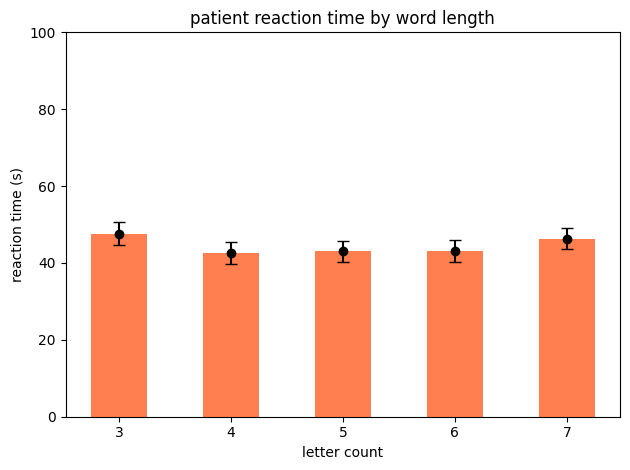

In [7]:
plt.bar(wordlenlist, timelen_y, color = "coral", width = 0.5)
plt.errorbar(wordlenlist, timelen_y, yerr = timelen_err, fmt = 'o', color = "black", capsize = 4)
plt.title("patient reaction time by word length")
plt.xlabel("letter count")
plt.ylabel("reaction time (s)")
plt.ylim(0,100)

plt.tight_layout()
plt.show()

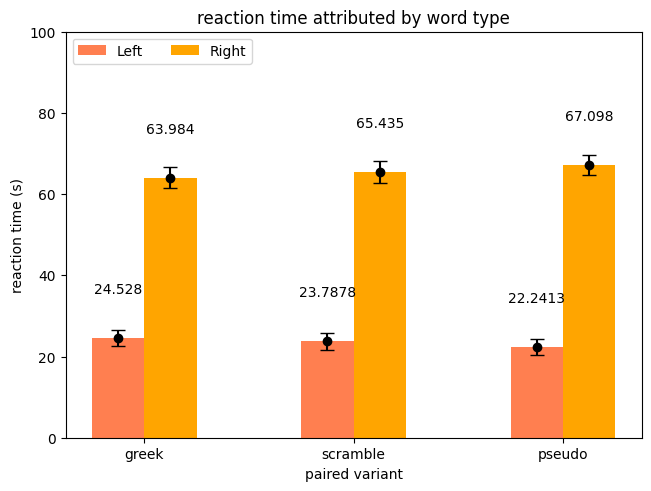

In [8]:
# create new list of variable for left and right
timepairL_y = timepair_y[::2]
timepairR_y = timepair_y[1::2]

timepairL_err = timepair_err[::2]
timepairR_err = timepair_err[1::2]

wordx = ["greek", "scramble", "pseudo"]
subplot = {"Left":timepairL_y,"Right":timepairR_y }
subplote = {"Left":timepairL_err, "Right": timepairR_err}

x = np.arange(len(wordx))  # the label locations, in this case its [0,1,2]
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, mean in subplot.items():
    offset = width * multiplier # step every bar offset, 0+0 shit in L, 0+0.25 shift in R
    colbar = "coral" if attribute == "Left" else "orange"
    rects = ax.bar(x + offset, mean, width, label=attribute, color = colbar)
    ax.bar_label(rects, padding=30)
    ax.errorbar(x + offset, mean, yerr=subplote[attribute], fmt='o', capsize=5, color='black')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('reaction time (s)')
ax.set_title('reaction time attributed by word type')
ax.set_xticks(x + width/2, wordx)
ax.set_xlabel("paired variant")
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)    

plt.show()

## Mean of accuray by word pair AND word length?
necessary? probably.

Text(0.5, 1.0, 'Accuracy ratio mean by word pair type and word length')

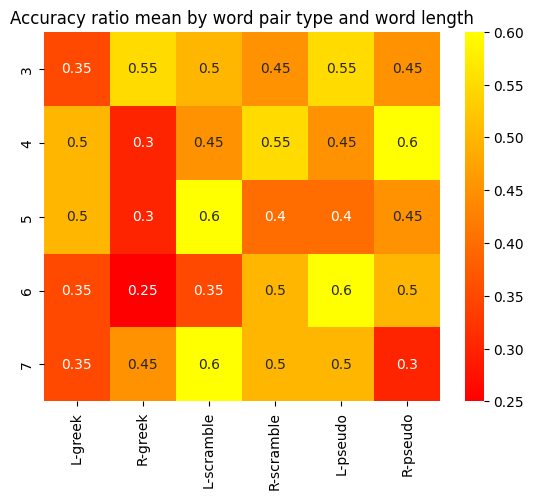

In [9]:
resultpanel = []

# create dataframe, row as the word length
for len in wordlenlist:
    rowlen = []

    # then each column as the word pair type
    for pair in wordlist:
        test = np.mean(accudf.loc[accudf["len"] == len, pair])
        rowlen.append(test)
    
    resultpanel.append(rowlen)

#create df and use seaborn to plot heatmap? autumn theme looks nice
accuresultdf = pd.DataFrame(resultpanel)

sea.heatmap(accuresultdf, annot=True, xticklabels= wordlist, yticklabels= wordlenlist, cmap="autumn").set_title("Accuracy ratio mean by word pair type and word length")

## Mean of reaction time by word pair AND word length?
necessary? eh... maybe?

Text(0.5, 1.0, 'Reaction time mean by word pair type and word length (second)')

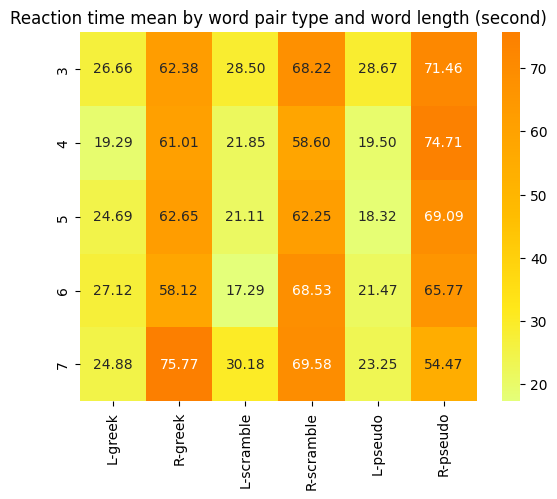

In [10]:
resultpanel = []

# create dataframe, row as the word length
for len in wordlenlist:
    rowlen = []

    # then each column as the word pair type
    for pair in wordlist:
        test = np.mean(timedf.loc[accudf["len"] == len, pair])
        rowlen.append(test)
    
    resultpanel.append(rowlen)

timeresultdf = pd.DataFrame(resultpanel)

sea.heatmap(timeresultdf, annot=True, xticklabels= wordlist, yticklabels= wordlenlist,  fmt=".2f", cmap="Wistia").set_title("Reaction time mean by word pair type and word length (second)")

## Chi square test
Use Chi square test to check whether if there is an accuracy difference between group, onlyl by word pair and word length again
used because the data may not necessarily normally distributed but should have a similar shape


In [ ]:
import scipy.stats as stat

def allcolrw(dataframe):
    cwdf = pd.DataFrame(index=["correct (n)", "wrong (n)"])
    # Combine left and right values for each word pair type
    for pp in wordlist:
        correct = (dataframe[pp] == 1).sum()
        wrong =  (dataframe[pp] == 0).sum()
        cwdf[pp] = [correct, wrong]
    print(cwdf)

def wordcolrw(dataframe):
    wordlistm = ["greek", "scramble","pseudo"]
    cwmdf = pd.DataFrame(index=["correct (n)", "wrong (n)"], columns=wordlistm)

    for pp in wordlist[::2]:  # Looping through every 2nd item from wordlist
        dx = dataframe.columns.get_loc(pp)  # Get the column index for current pp
        correct = (dataframe.iloc[:, dx] == 1).sum() + (dataframe.iloc[:, dx + 1] == 1).sum()  # Count correct
        wrong = (dataframe.iloc[:, dx] == 0).sum() + (dataframe.iloc[:, dx + 1] == 0).sum()  # Count wrong
        
        # Assign correct and wrong values to corresponding wordlistm columns
        col_name = pp.split('-')[1]  # Extracting the word part (like 'greek', 'scramble', 'pseudo')
        cwmdf.loc["correct (n)", col_name] = correct
        cwmdf.loc["wrong (n)", col_name] = wrong

    print(cwmdf)
# print(stat.chisquare(chi, axis=1))

def sidecolrw(dataframe):
    # compare between Left and Right type
    side_types = ["Left", "Right"]
    cwlrdf = pd.DataFrame(index=["correct (n)", "wrong (n)"], columns=side_types)

    for pp in [0,1]:  # Looping through every 2nd item from wordlist

        correct = (dataframe.iloc[:, 3*pp+2] == 1).sum() + (dataframe.iloc[:, 3*pp+3] == 1).sum() + (dataframe.iloc[:, 3*pp+4] == 1).sum() # Count correct
        wrong = (def.iloc[:, 3*pp+2] == 0).sum() + (accudf.iloc[:, 3*pp+3] == 0).sum() + (accudf.iloc[:, 3*pp+4] == 0).sum()  # Count wrong
        
        # Assign correct and wrong values to corresponding wordlistm columns
        col_name = side_types[pp]  # Extracting the word part (like 'greek', 'scramble', 'pseudo')
        cwlrdf.loc["correct (n)", col_name] = correct
        cwlrdf.loc["wrong (n)", col_name] = wrong

print(cwlrdf)


allcolrw(accudf)
wordcolrw(accudf)


            Left Right
correct (n)  128   144
wrong (n)    172   156
             L-greek  R-greek  L-scramble  R-scramble  L-pseudo  R-pseudo
correct (n)       41       37          50          48        50        46
wrong (n)         59       63          50          52        50        54


In [19]:
for peof in range(2):
    print(peof)

0
1
